# Import des données

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [12]:
data = pd.read_csv('breast+cancer+coimbra/dataR2.csv', sep=',', )
print(data.shape)
print(data.head())
data.info()

features= data.columns[:-1]
print(features)

(116, 10)
   Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  

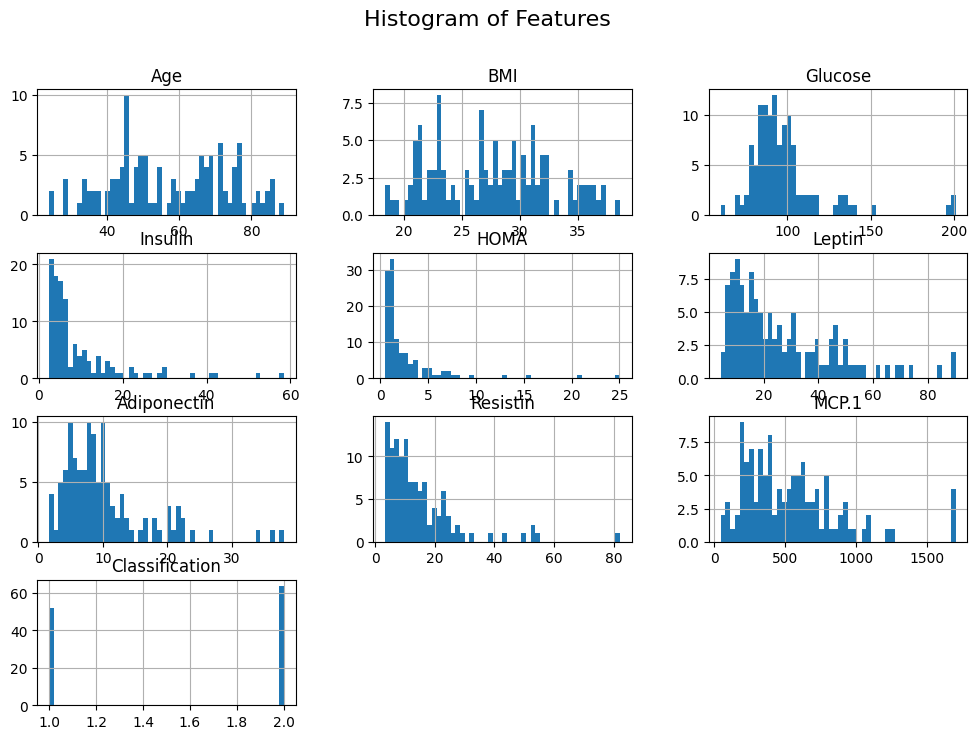

In [23]:
#visualize the data
data.hist( bins=50,figsize=(12,8))
plt.suptitle('Histogram of Features', fontsize=16)
plt.show()

# Analyse des données et variables

In [24]:
#split des données 
from sklearn.model_selection import train_test_split
X = data.drop(columns='Classification')
y = data['Classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


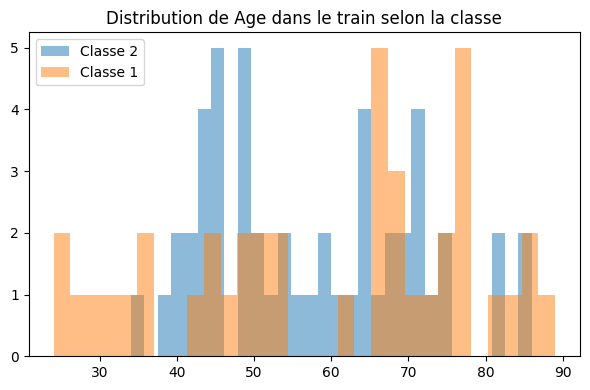

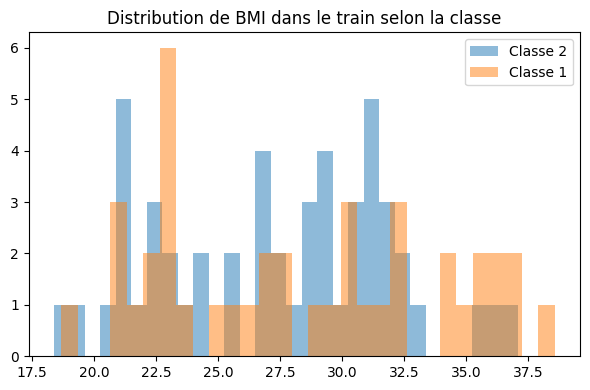

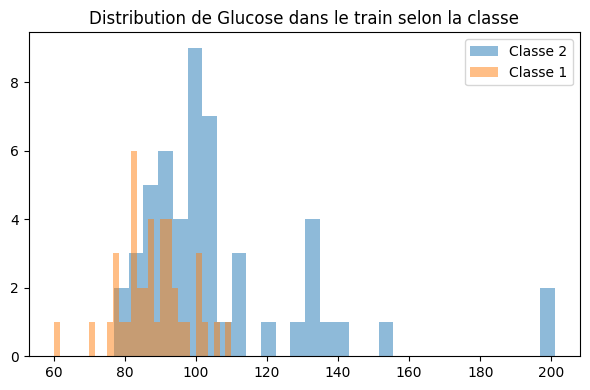

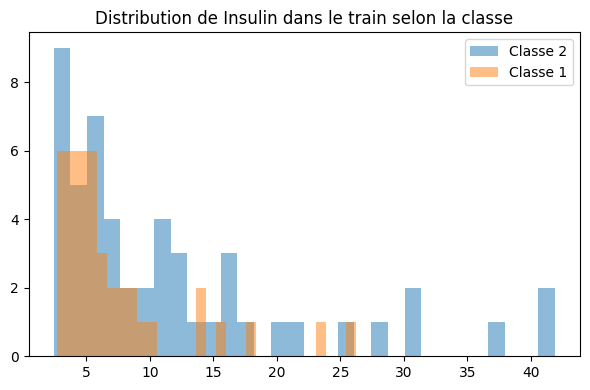

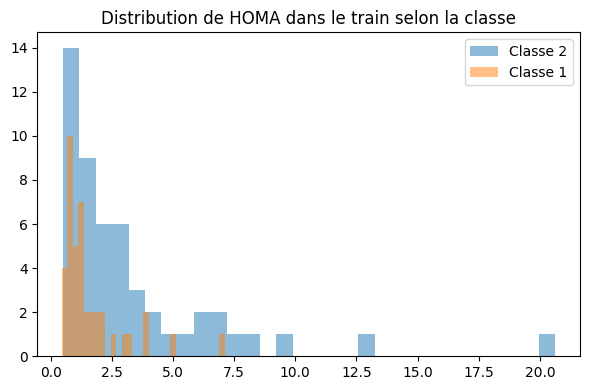

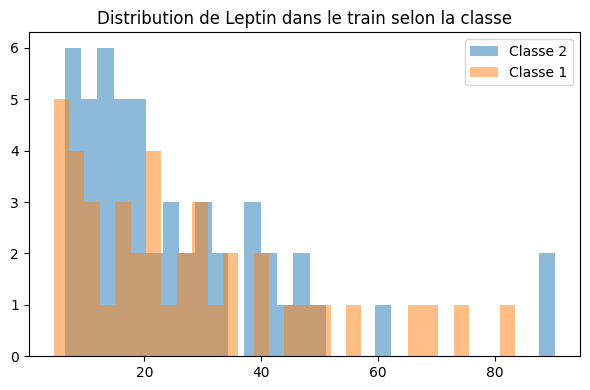

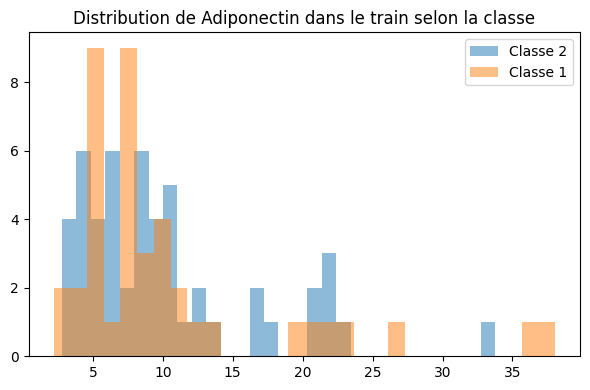

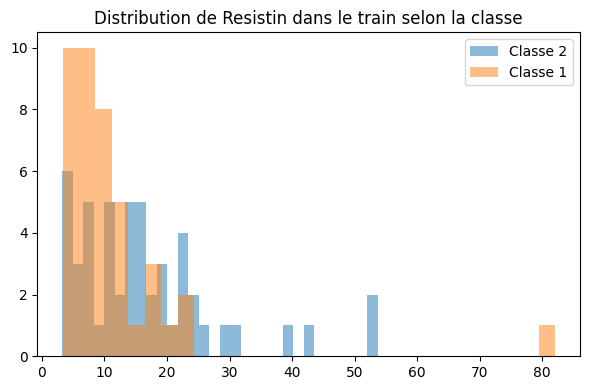

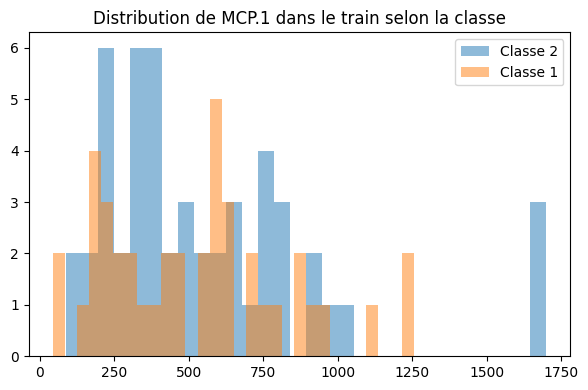

In [25]:
# Visualisation de la distribution des caractéristiques par classe dans le données train
# On regroupe X_train et y_train pour faciliter l'affichage
train_data = X_train.copy()
train_data['Classification'] = y_train

# Liste des colonnes explicatives
features = X_train.columns  # ou data.columns[:-1]

# Boucle de visualisation
for col in features:
    plt.figure(figsize=(6, 4))
    for class_label in y_train.unique():
        plt.hist(train_data[train_data['Classification'] == class_label][col],
                 bins=30, alpha=0.5, label=f'Classe {class_label}')
    plt.title(f"Distribution de {col} dans le train selon la classe")
    plt.legend()
    plt.tight_layout()
    plt.show()


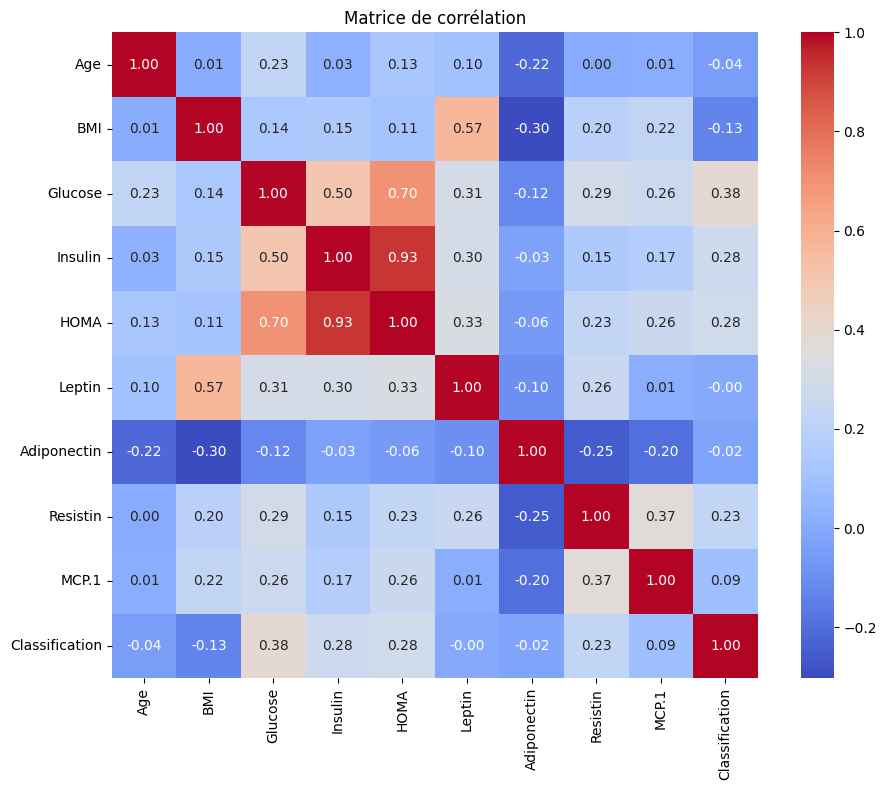

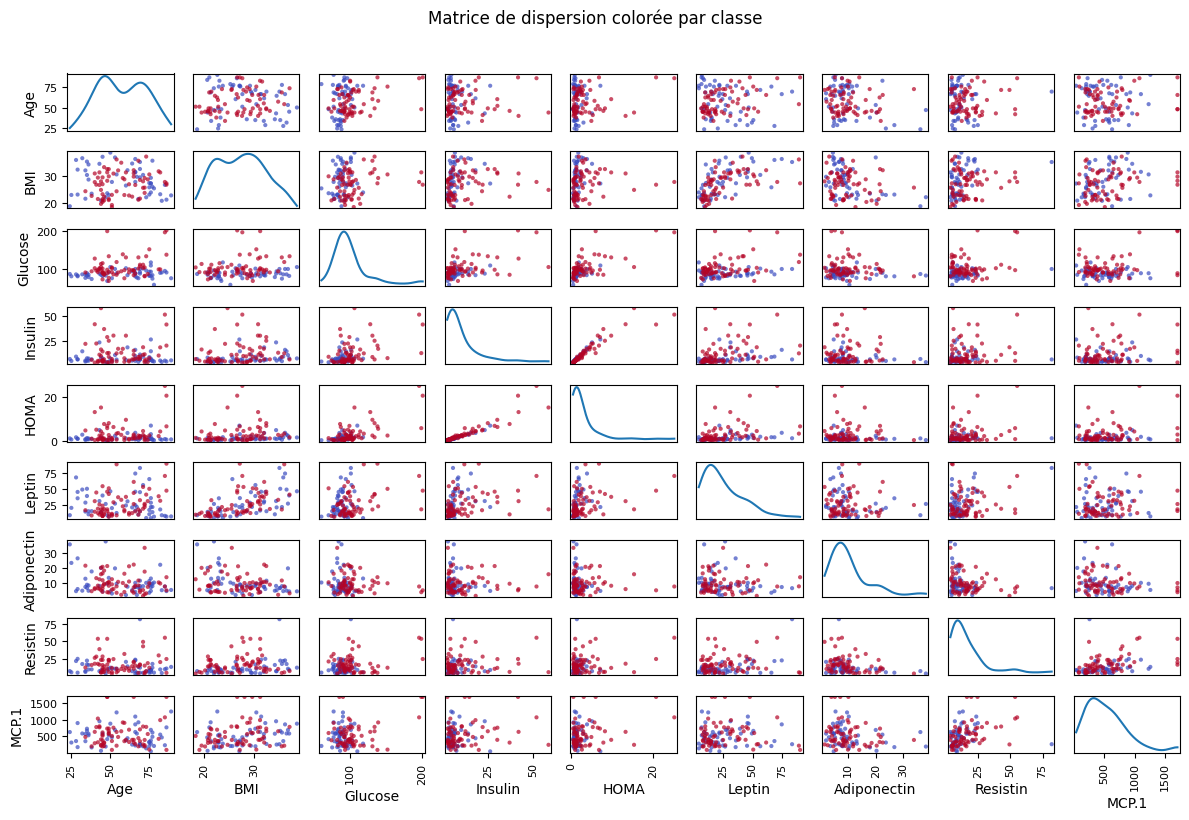

In [ ]:
#matrice de corrélation 

corr_matrix =data.corr()

plt.figure(figsize=(10,8))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()

from pandas.plotting import scatter_matrix

# Recoder la cible si besoin
data_colored = data.copy()
data_colored['Classification'] = data_colored['Classification'].map({1: "Classe 1", 2: "Classe 2"})
# Scatter matrix avec couleur
scatter_matrix(data[features], figsize=(12, 8), diagonal='kde', 
               c=data['Classification'], cmap='coolwarm', alpha=0.7)
plt.suptitle("Matrice de dispersion colorée par classe", y=1.02)
plt.tight_layout()
plt.show()

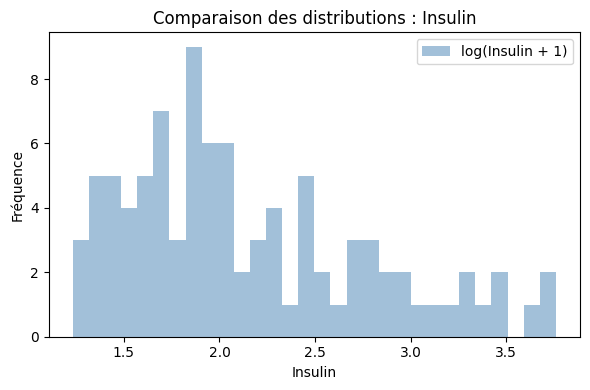

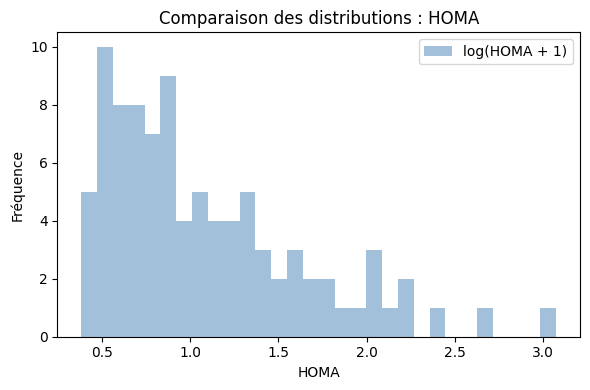

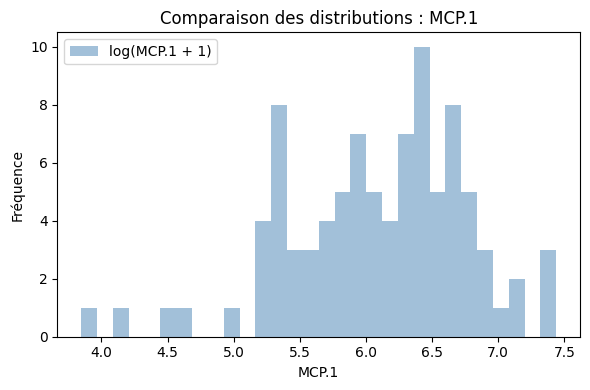

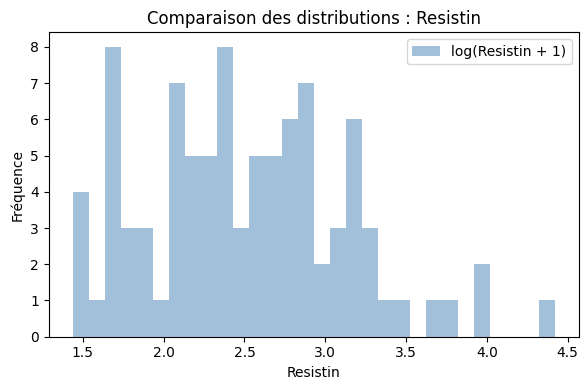

In [ ]:
# on applique des transformations aux variables 
# Copie des données d'origine pour transformation
X_transformed = X_train.copy()

# Variables à transformer
variables_log = ['Insulin', 'HOMA', 'MCP.1', 'Resistin']

# Appliquer la transformation log(x + 1) et enregistrer dans X_transformed
for col in variables_log:
    original = X_train[col]
    transformed = np.log1p(original)  # log(x + 1)
    
    # ✅ Ajout de la colonne transformée
    X_transformed[col + '_log'] = transformed

    # Affichage de la comparaison
    plt.figure(figsize=(6, 4))
    #plt.hist(original, bins=30, alpha=0.5, label=f"{col} (original)", color='orange') #Plot des données originale
    plt.hist(transformed, bins=30, alpha=0.5, label=f"log({col} + 1)", color='steelblue')
    plt.title(f"Comparaison des distributions : {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.legend()
    plt.tight_layout()
    plt.show()

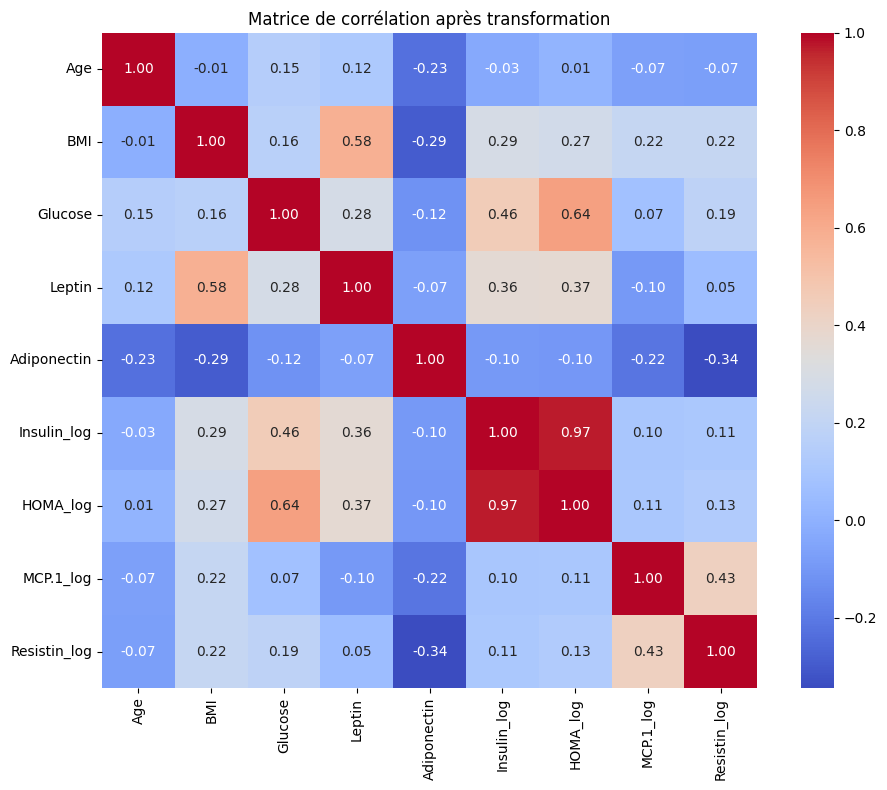

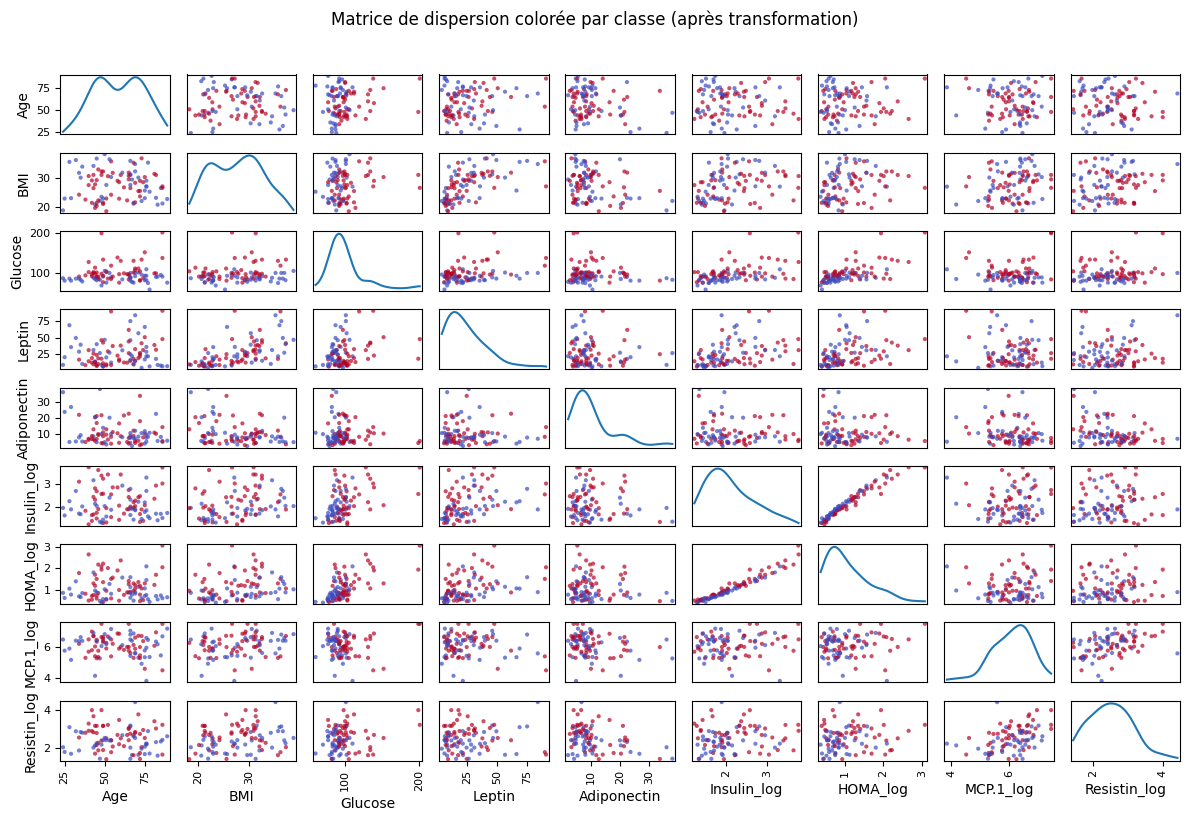

In [46]:
# Supprimer uniquement les colonnes originales si elles existent dans X_transformed
X_transformed = X_transformed.drop(columns=[col for col in variables_log if col in X_transformed.columns])
# Mise à jour de la liste des variables explicatives
features = X_transformed.columns.tolist()


corr_matrix2 = X_transformed.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix2, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Matrice de corrélation après transformation")
plt.tight_layout()
plt.show()

# On ajoute la variable cible dans un DataFrame combiné
X_visu = X_transformed.copy()
X_visu['Classification'] = y_train.values  # ou y.values si sur tout le dataset

# Scatter matrix colorée (facultatif)
scatter_matrix(X_visu.drop(columns='Classification'),
               figsize=(12, 8),
               diagonal='kde',
               c=X_visu['Classification'],
               cmap='coolwarm',
               alpha=0.7)
plt.suptitle("Matrice de dispersion colorée par classe (après transformation)", y=1.02)
plt.tight_layout()
plt.show()




### Transformation des variables : justification et mise en œuvre

Plusieurs variables du jeu de données présentaient des distributions fortement asymétriques, avec des valeurs extrêmes susceptibles d'influencer négativement l'apprentissage des modèles. En particulier, les variables `Insulin`, `HOMA`, `MCP.1` et `Resistin` montraient une forte dispersion vers la droite (longue queue), comme le confirment les histogrammes exploratoires.

Afin de rendre ces variables plus adaptées à la modélisation, nous leur avons appliqué une transformation logarithmique de la forme :

\[
x --> log(1 + x)
\]

Cette transformation présente plusieurs avantages :
- Elle **réduit l'effet des valeurs extrêmes** en compressant l'échelle,
- Elle **améliore la symétrie** de la distribution, ce qui est favorable à des modèles sensibles à la forme des données (comme la régression logistique ou les SVM linéaires),
- Elle **préserve l'ordre des valeurs** tout en limitant leur variance.

Nous avons visualisé, pour chaque variable transformée, la distribution avant et après transformation. Ces comparaisons ont confirmé l'intérêt de la démarche : les distributions log-transformées sont plus concentrées, moins asymétriques, et mieux adaptées à une normalisation ultérieure.

Les nouvelles variables créées (`Insulin_log`, `HOMA_log`, `MCP.1_log`, `Resistin_log`) remplacent les versions originales dans notre jeu de données transformé, afin d’éviter toute redondance et de garantir une meilleure stabilité des modèles.

Ces transformations constituent une étape importante du prétraitement, en particulier dans le contexte d’un dataset de petite taille, où la présence d’outliers peut fortement biaiser les apprentissages.


In [ ]:
# Standardisation 
from sklearn.preprocessing import StandardScaler

# Création d'un scaler
scaler = StandardScaler()

# Standardisation de tout X_transformed (toutes les colonnes d’un coup)
X_scaled = pd.DataFrame(scaler.fit_transform(X_transformed),
                        columns=X_transformed.columns,
                        index=X_transformed.index)

# On supprime les variables 'Adiponectin' et 'Leptin' de X_scaled car elles sont pas très informatives
X_scaled = X_scaled.drop(columns=['Adiponectin', 'Leptin'])




In [51]:
print(y_train.value_counts(normalize=True))


Classification
2    0.554348
1    0.445652
Name: proportion, dtype: float64


# Création des modèles 

# 1. Logistic reg

In [55]:
from sklearn.linear_model import LogisticRegression

mod_logReg=LogisticRegression(random_state=42)
mod_logReg.fit(X_scaled,y_train)

LogisticRegression(random_state=42)